In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder


In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [4]:
df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [9]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [10]:
df.shape

(205, 26)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

<Axes: >

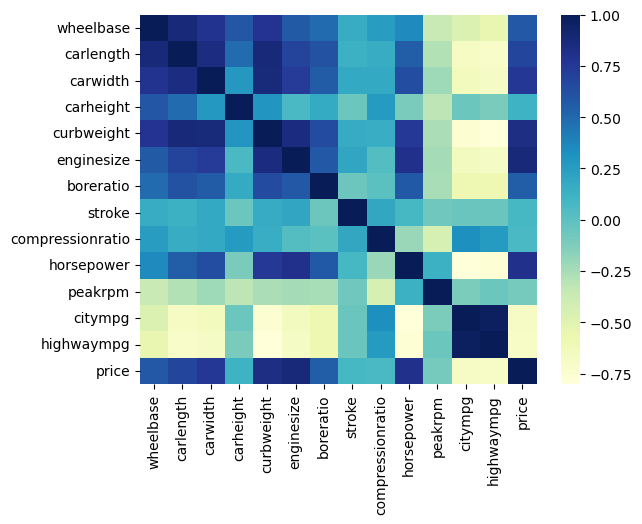

In [17]:
df_droped = df.drop(['car_ID','symboling','CarName','fueltype','aspiration','enginetype','cylindernumber','doornumber','carbody','drivewheel','enginelocation','fuelsystem'], axis =1)
sns.heatmap(df_droped.corr(),cmap = 'YlGnBu')

In [16]:
df_droped

,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,ohc,four,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,109.1,188.8,68.8,55.5,3049,ohc,four,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,109.1,188.8,68.9,55.5,3012,ohcv,six,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,109.1,188.8,68.9,55.5,3217,ohc,six,145,3.01,3.40,23.0,106,4800,26,27,22470.0


Text(0, 0.5, 'price')

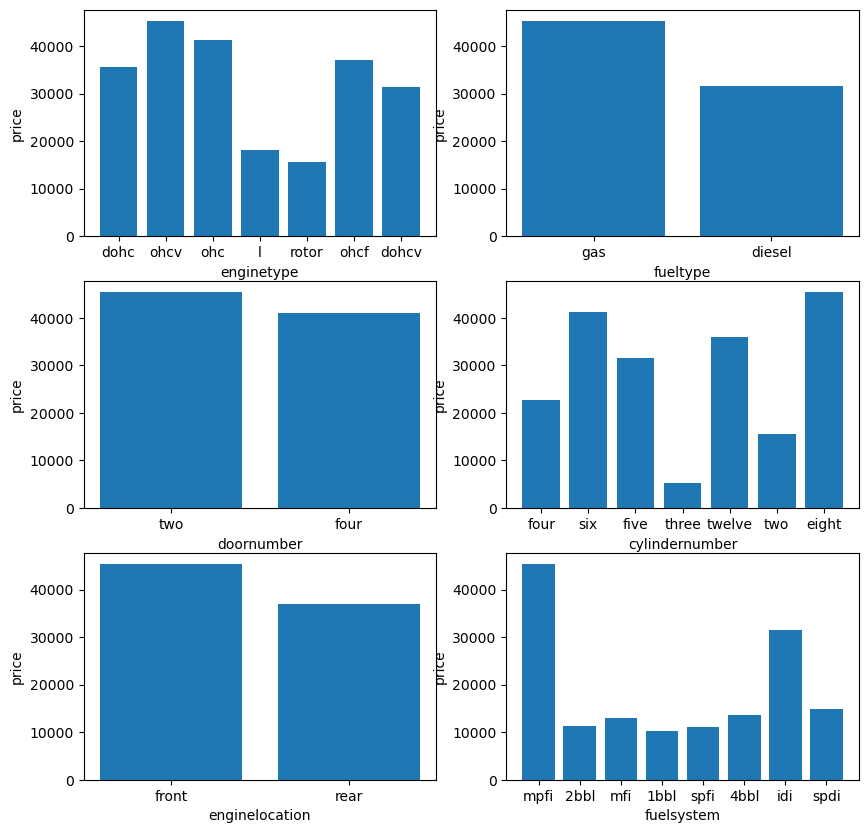

In [32]:
#'CarName',,'aspiration'carbody','drivewheel','enginelocation
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
axs[0, 0].bar(df['enginetype'], df['price'])
# Adding labels and title
axs[0, 0].set_xlabel('enginetype')
axs[0, 0].set_ylabel('price')


axs[0, 1].bar(df['fueltype'], df['price'])
# Adding labels and title
axs[0, 1].set_xlabel('fueltype')
axs[0, 1].set_ylabel('price')


axs[1, 0].bar(df['doornumber'], df['price'])
# Adding labels and title
axs[1, 0].set_xlabel('doornumber')
axs[1, 0].set_ylabel('price')


axs[1, 1].bar(df['cylindernumber'], df['price'])
# Adding labels and title
axs[1, 1].set_xlabel('cylindernumber')
axs[1, 1].set_ylabel('price')


axs[2,0].bar(df['enginelocation'], df['price'])
# Adding labels and title
axs[2,0].set_xlabel('enginelocation')
axs[2,0].set_ylabel('price')


axs[2, 1].bar(df['fuelsystem'], df['price'])
# Adding labels and title
axs[2, 1].set_xlabel('fuelsystem')
axs[2, 1].set_ylabel('price')


In [42]:
x_model = df.drop(['car_ID','symboling','aspiration','CarName','fueltype','enginetype','cylindernumber','enginelocation','peakrpm','stroke','compressionratio','carheight','price'], axis =1)
y_model = df['price']
x_model

,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg
0,two,convertible,rwd,88.6,168.8,64.1,2548,130,mpfi,3.47,111,21,27
1,two,convertible,rwd,88.6,168.8,64.1,2548,130,mpfi,3.47,111,21,27
2,two,hatchback,rwd,94.5,171.2,65.5,2823,152,mpfi,2.68,154,19,26
3,four,sedan,fwd,99.8,176.6,66.2,2337,109,mpfi,3.19,102,24,30
4,four,sedan,4wd,99.4,176.6,66.4,2824,136,mpfi,3.19,115,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,four,sedan,rwd,109.1,188.8,68.9,2952,141,mpfi,3.78,114,23,28
201,four,sedan,rwd,109.1,188.8,68.8,3049,141,mpfi,3.78,160,19,25
202,four,sedan,rwd,109.1,188.8,68.9,3012,173,mpfi,3.58,134,18,23
203,four,sedan,rwd,109.1,188.8,68.9,3217,145,idi,3.01,106,26,27


In [47]:
unique_values1 = df['carbody'].unique()
unique_values2 = df['doornumber'].unique()
unique_values3 = df['drivewheel'].unique()
unique_values4 = df['fuelsystem'].unique()
print(unique_values1)
print(unique_values2)
print(unique_values3)
print(unique_values4)

['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['two' 'four']
['rwd' 'fwd' '4wd']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [54]:
encoder = OneHotEncoder()
#double square brackets ([["Embarked"]]) ensure that the result is a DataFrame, not a Series. 
#This is important because OneHotEncoder expects a 2D array-like structure as input, which a DataFrame provides.
matrix = encoder.fit_transform(x_model[["carbody"]]).toarray()
column_names = ["convertible","hatchback","sedan","wagon","hardtop"]
#matrix transpose
for i in range(len(matrix.T)):
    x_model[column_names[i]] = matrix.T[i]
matrix = encoder.fit_transform(x_model[["doornumber"]]).toarray()
column_names = ["two","four"]
#matrix transpose
for i in range(len(matrix.T)):
    x_model[column_names[i]] = matrix.T[i]
matrix = encoder.fit_transform(x_model[["drivewheel"]]).toarray()
column_names = ['rwd', 'fwd', '4wd']
#matrix transpose
for i in range(len(matrix.T)):
    x_model[column_names[i]] = matrix.T[i]
matrix = encoder.fit_transform(x_model[["fuelsystem"]]).toarray()
column_names = ['mpfi', '2bbl' ,'mfi' ,'1bbl' ,'spfi', '4bbl' ,'idi' ,'spdi']
#matrix transpose
for i in range(len(matrix.T)):
    x_model[column_names[i]] = matrix.T[i]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(x_model, y_model, test_size=0.2, random_state=42)

In [61]:
X_train = X_train.drop(['doornumber','carbody','drivewheel','fuelsystem'], axis = 1)

In [62]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [66]:
X_test = X_test.drop(['doornumber','carbody','drivewheel','fuelsystem'], axis = 1)

In [67]:
y_pred = model.predict(X_test)
print('Predicted values:', y_pred)

# Evaluating the model (for example, using mean squared error)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

print('Mean Squared Error:', mse)

Predicted values: [26033.15048014 20107.25718619 11925.90554366 10689.44906161
 23287.86383941  5249.11765224  7000.16046587  8261.30380353
  7501.26891997  8485.99869754 15696.52201811  6423.10798222
 17361.13788834 10940.5720643  37983.39477077  5912.87831833
 -2797.10670839 13347.03028728 11676.71554575  9265.4635444
 11963.67935937 20658.61720297 11034.57112456  1409.68915486
  7640.93486201 25849.11112908 18500.64523483 13548.92607637
  5132.41844015 15358.05688351 25197.9686486   6255.17946642
  7113.00623063 22704.850283    6273.89023082 28253.39792488
 12479.50425935 12747.2339381   6226.42910655 13234.98954073
  6966.78926955]
Mean Squared Error: 15090604.114367476


<h4> 
    The mean squared error is large here so I will try to solve this problem and resubmit if possible
</h4>

In [79]:
max_value = y_train.max()
print("Maximum value in the column:", max_value)

Maximum value in the column: 45400.0


In [80]:
y_train

66     18344.0
111    15580.0
153     6918.0
96      7499.0
38      9095.0
        ...   
106    18399.0
14     24565.0
92      6849.0
179    15998.0
102    14399.0
Name: price, Length: 164, dtype: float64